In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
from scipy import stats
import numpy as np

# Utilization comparison

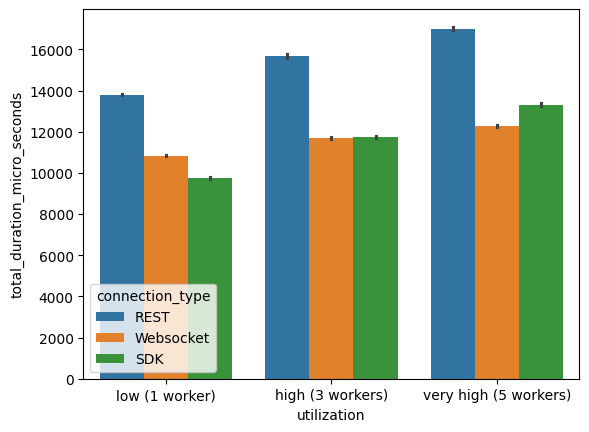

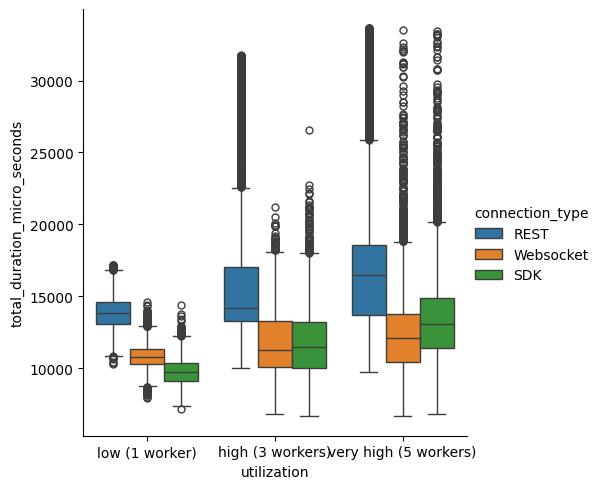

In [8]:
query = "SELECT * FROM results WHERE query_type='select'"
conn1 = sqlite3.connect('results/1w_10m.sqlite')
df1 = pd.read_sql_query(query,conn1)
df1.insert(0, 'utilization', "low (1 worker)")
df1.drop('id', axis=1, inplace=True)
df1_new = df1[np.abs(stats.zscore(df1["total_duration_micro_seconds"])) < 3]
conn3 = sqlite3.connect('results/3w_10m.sqlite')
df3 = pd.read_sql_query(query,conn3)
df3.insert(0, 'utilization', "high (3 workers)")
df3.drop('id', axis=1, inplace=True)
df3_new = df3[np.abs(stats.zscore(df3["total_duration_micro_seconds"])) < 3]
conn5 = sqlite3.connect('results/5w_10m.sqlite')
df5 = pd.read_sql_query(query,conn5)
df5.insert(0, 'utilization', "very high (5 workers)")
df5.drop('id', axis=1, inplace=True)
df5_new = df5[np.abs(stats.zscore(df5["total_duration_micro_seconds"])) < 3]

df = pd.concat([df1_new, df3_new, df5_new])
sns.barplot(data=df, x="utilization", y="total_duration_micro_seconds", hue="connection_type")
sns.catplot(data=df, x="utilization", y="total_duration_micro_seconds", kind="box", hue="connection_type")


# Run comparison

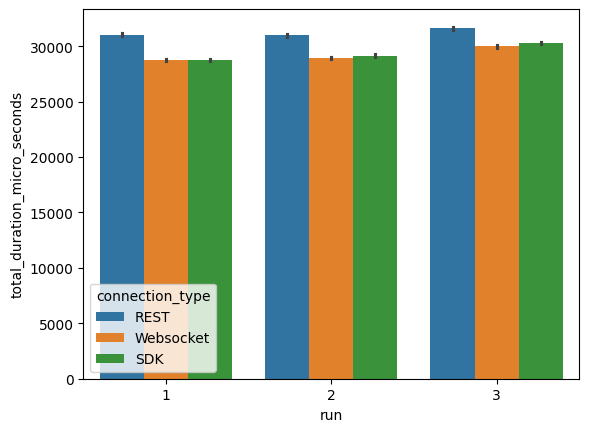

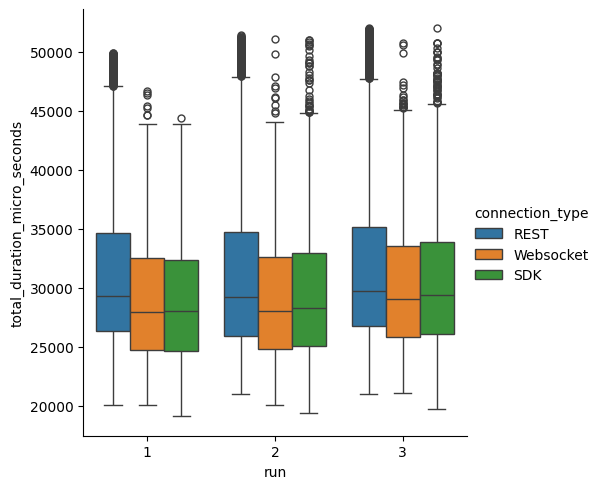

In [18]:
query = "SELECT * FROM results WHERE query_type='join_relation'"
conn1 = sqlite3.connect('results/3w_10m.sqlite')
df1 = pd.read_sql_query(query,conn1)
df1.insert(0, 'run', "1")
df1.drop('id', axis=1, inplace=True)
df1_new = df1[np.abs(stats.zscore(df1["total_duration_micro_seconds"])) < 3]
conn3 = sqlite3.connect('results/3w_10m_2.sqlite')
df3 = pd.read_sql_query(query,conn3)
df3.insert(0, 'run', "2")
df3.drop('id', axis=1, inplace=True)
df3_new = df3[np.abs(stats.zscore(df3["total_duration_micro_seconds"])) < 3]
conn5 = sqlite3.connect('results/3w_10m_3.sqlite')
df5 = pd.read_sql_query(query,conn5)
df5.insert(0, 'run', "3")
df5.drop('id', axis=1, inplace=True)
df5_new = df5[np.abs(stats.zscore(df5["total_duration_micro_seconds"])) < 3]

df = pd.concat([df1_new, df3_new, df5_new])
sns.barplot(data=df, x="run", y="total_duration_micro_seconds", hue="connection_type")
sns.catplot(data=df, x="run", y="total_duration_micro_seconds", kind="box", hue="connection_type")

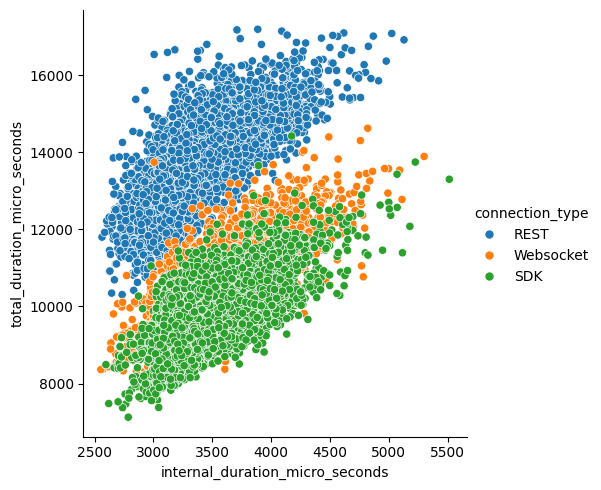

In [3]:
# INTERNAL VS TOTAL DURATION SELECT SCATTER PLOT
conn = sqlite3.connect('results/1w_10m.sqlite')
query = "SELECT * FROM results WHERE query_type='select'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.relplot(data=df_new, x="internal_duration_micro_seconds", y="total_duration_micro_seconds", hue="connection_type")
sns.catplot(data=df, x="run", y="total_duration_micro_seconds", kind="box", hue="connection_type")

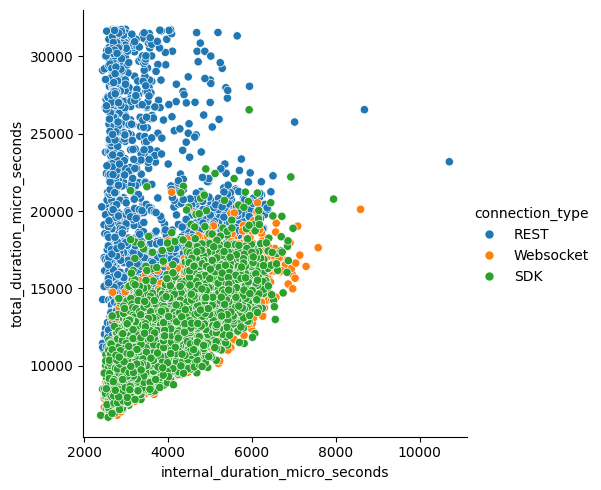

In [25]:
# INTERNAL VS TOTAL DURATION SELECT SCATTER PLOT
conn = sqlite3.connect('results/3w_10m.sqlite')
query = "SELECT * FROM results WHERE query_type='select'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.relplot(data=df_new, x="internal_duration_micro_seconds", y="total_duration_micro_seconds", hue="connection_type")

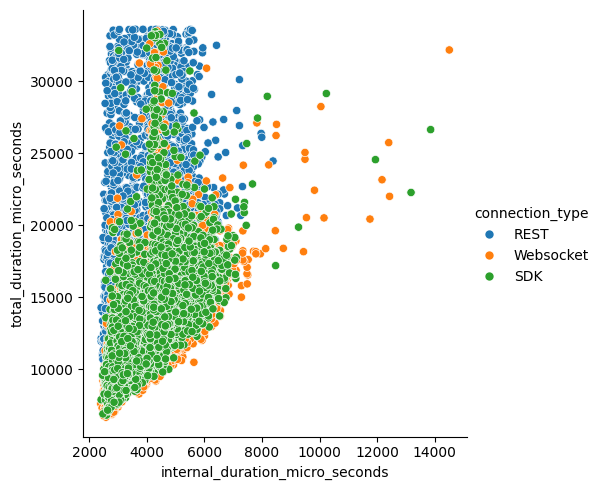

In [5]:
# INTERNAL VS TOTAL DURATION SELECT SCATTER PLOT
conn = sqlite3.connect('results/5w_10m.sqlite')
query = "SELECT * FROM results WHERE query_type='select'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.relplot(data=df_new, x="internal_duration_micro_seconds", y="total_duration_micro_seconds", hue="connection_type") 

<Axes: xlabel='query_type', ylabel='total_duration_micro_seconds'>

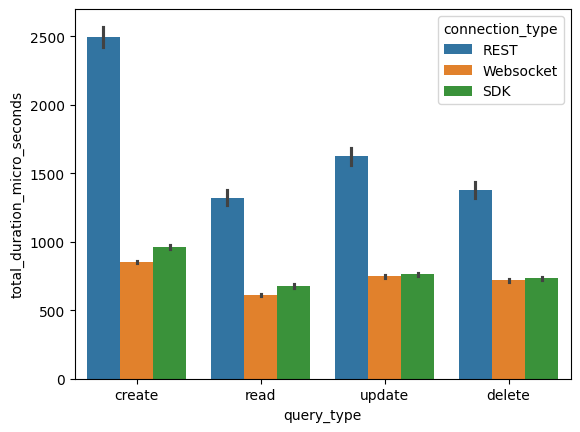

In [21]:
conn = sqlite3.connect('results/3w_10m.sqlite')
query = "SELECT * FROM results WHERE query_type='create' or query_type='read' or query_type='update' or query_type='delete'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.barplot(data=df_new, x="query_type", y="total_duration_micro_seconds", hue="connection_type")

<Axes: xlabel='query_type', ylabel='total_duration_micro_seconds'>

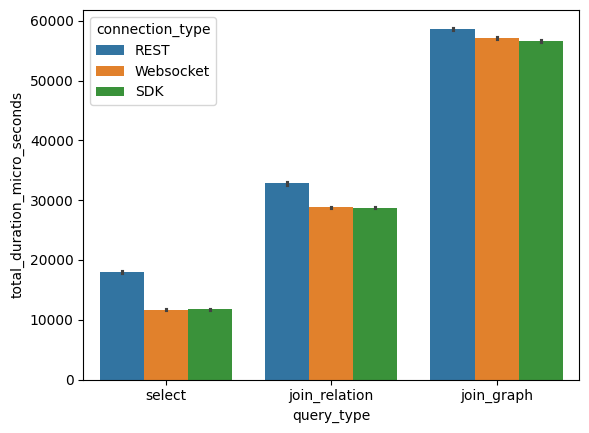

In [13]:
query = "SELECT * FROM results WHERE query_type='select' or query_type='join_relation' or query_type='join_graph'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.barplot(data=df_new, x="query_type", y="total_duration_micro_seconds", hue="connection_type")

<Axes: xlabel='internal_duration_micro_seconds', ylabel='total_duration_micro_seconds'>

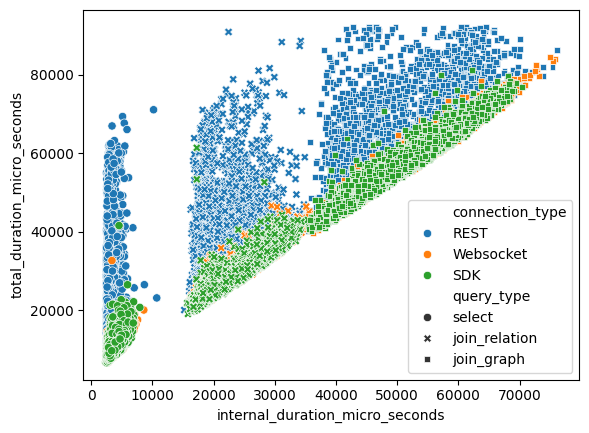

In [29]:
query = "SELECT * FROM results WHERE query_type='select' or query_type='join_relation' or query_type='join_graph'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.scatterplot(data=df_new, x="internal_duration_micro_seconds", y="total_duration_micro_seconds", hue="connection_type", style="query_type")

<Axes: xlabel='query_type', ylabel='internal_duration_micro_seconds'>

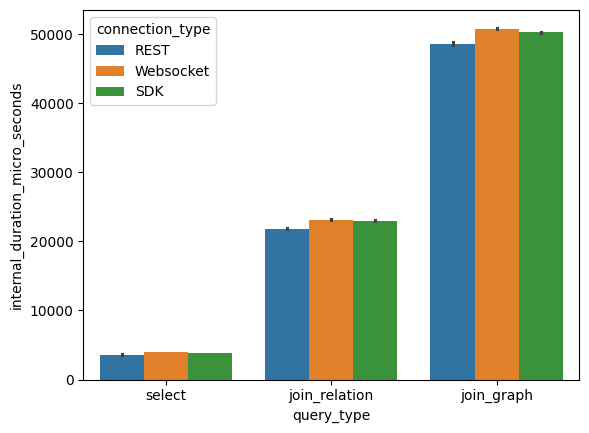

In [30]:
sns.barplot(data=df_new, x="query_type", y="internal_duration_micro_seconds", hue="connection_type")

<Axes: xlabel='created_at', ylabel='total_duration_micro_seconds'>

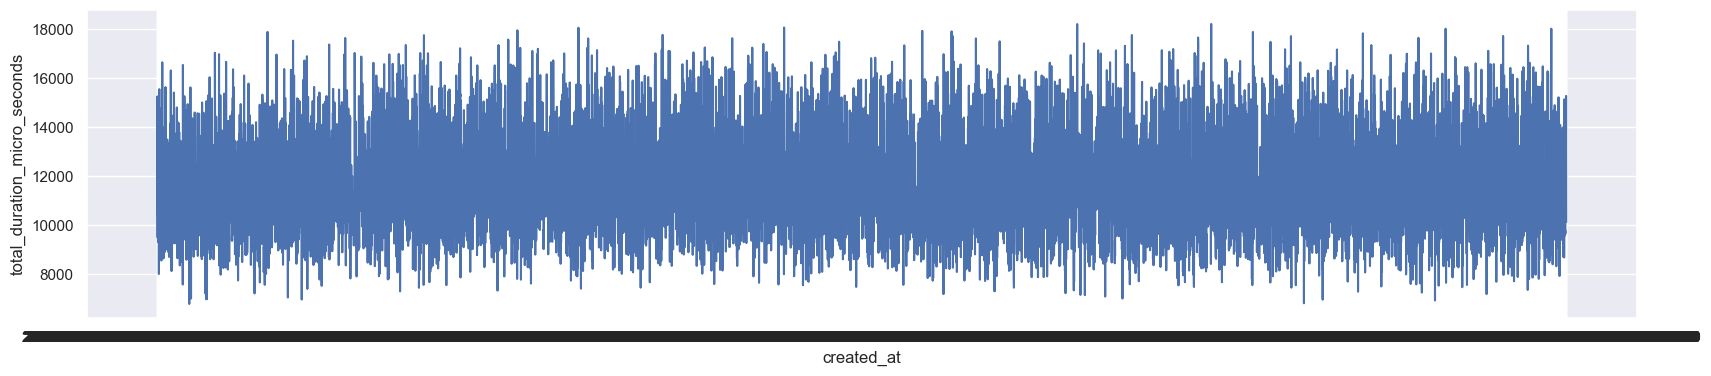

In [18]:
query = "SELECT * FROM results WHERE query_type='select' and connection_type='Websocket'"
df = pd.read_sql_query(query,conn)
df_new = df[np.abs(stats.zscore(df["total_duration_micro_seconds"])) < 3]
sns.set(rc={'figure.figsize':(20,4)})
sns.lineplot(data=df_new, x="created_at", y="total_duration_micro_seconds")